<a href="https://colab.research.google.com/github/MCHGR/Modelos/blob/main/Tercer_modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import os
import pathlib
import tensorflow as tf 
#import matplotlib.pyplot as plt /content/drive/MyDrive/dataset/dataset/real/images/Drag 
ruta_Drag1 = "/content/drive/MyDrive/Dataset2/data/four_short"

Drag_train = []
img_size = 150

for img in os.listdir(ruta_Drag1):
  img = cv2.imread(os.path.join(ruta_Drag1,img))
#img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img_gray_resize = cv2.resize(img,(img_size,img_size))
  Drag_train.append([img_gray_resize])

#print(Drag_train.shape)
#print(Drag_train)

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(np.squeeze(train_Images[1000]))
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#/content/drive/MyDrive/dataset/dataset/real/images/Loupe
ruta_Loupe1 = "/content/drive/MyDrive/Dataset2/data/one_short"
Loupe_train = []
img_size2 = 150



for img2 in os.listdir(ruta_Loupe1):
  img2 = cv2.imread(os.path.join(ruta_Loupe1,img2))
# img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img_gray_resize2 = cv2.resize(img2,(img_size2,img_size2))
  Loupe_train.append([img_gray_resize2])
#  print(len(Drag_train))
#  print(Drag_train)





In [ ]:
#/content/drive/MyDrive/dataset/dataset/real/images/Loupe
ruta_peace = "/content/drive/MyDrive/Dataset2/data/peace_short"
peace_train = []
img_size2 = 150



for img2 in os.listdir(ruta_peace):
  img2 = cv2.imread(os.path.join(ruta_peace,img2))
# img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img_gray_resize2 = cv2.resize(img2,(img_size2,img_size2))
  peace_train.append([img_gray_resize2])
#  print(len(Drag_train))
#  print(Drag_train)


In [ ]:
peace_train = np.array(peace_train)
print(peace_train.shape)

Drag_train = np.array(Drag_train)
print(Drag_train.shape)

Loupe_train = np.array(Loupe_train)
print(Loupe_train.shape)

(5181, 1, 150, 150, 3)
(5139, 1, 150, 150, 3)
(5402, 1, 150, 150, 3)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, utils, callbacks


#Drag_train = np.array(Drag_train)
Drag_train = Drag_train.reshape((5139, 150, 150, 3)).astype("float32") / 255
train_images_D, val_images_D, test_images_D = Drag_train[0:1000], Drag_train[1000:1600], Drag_train[1600:2000]
etiquetas_1 = np.repeat(0,1000)
etiquetas_2 = np.repeat(0,600)
etiquetas_3 = np.repeat(0,400)
'''
#Drag_train = np.array(Drag_train)
Drag_train = Drag_train.reshape((5139, 150, 150, 3)).astype("float32") / 255
train_images_D, val_images_D, test_images_D = Drag_train[0:1000], Drag_train[1000:1600], Drag_train[1600:2000]
etiquetas_1 = np.repeat(0,1000)
etiquetas_2 = np.repeat(0,600)
#etiquetas_3 = np.repeat(0,400)
'''

#Loupe_train = np.array(Loupe_train)
Loupe_train = Loupe_train.reshape((5402, 150, 150, 3)).astype("float32") / 255
train_images_L, val_images_L, test_images_L = Loupe_train[0:1000], Loupe_train[1000:1600], Loupe_train[1600:2000]
etiquetas_10 = np.repeat(1,1000)
etiquetas_20 = np.repeat(1,600)
etiquetas_30 = np.repeat(1,400)

#Loupe_train = np.array(Loupe_train)
peace_train = peace_train.reshape((5181, 150, 150, 3)).astype("float32") / 255
train_images_P, val_images_P, test_images_P = peace_train[0:1000], peace_train[1000:1600], peace_train[1600:2000]
etiquetas_100 = np.repeat(2,1000)
etiquetas_200 = np.repeat(2,600)
etiquetas_300 = np.repeat(1,400)

'''
#Loupe_train = np.array(Loupe_train)
peace_train = peace_train.reshape((5181, 150, 150, 3)).astype("float32") / 255
train_images_P, val_images_P = peace_train[0:1000], peace_train[1000:1600]
etiquetas_100 = np.repeat(2,1000)
etiquetas_200 = np.repeat(2,600)
#etiquetas_300 = np.repeat(1,400)
'''

images_train = np.concatenate([train_images_D,train_images_L, train_images_P])
print(len(images_train))
Images_train = np.array(images_train)
print("imagenes train = ",Images_train.shape)

images_val = np.concatenate([val_images_D,val_images_L, val_images_P])
print(len(images_val))
Images_val = np.array(images_val)
print("imagenes val = ",Images_val.shape)

images_test = np.concatenate([test_images_D,test_images_L, test_images_P])
print(len(images_test))
Images_test = np.array(images_test)
print(Images_test.shape)



etiquetas_train = np.concatenate([etiquetas_1, etiquetas_10, etiquetas_100])
print(len(etiquetas_train))
Etiquetas_train = np.array(etiquetas_train)
print("etiquetas train = ",Etiquetas_train.shape)

etiquetas_val = np.concatenate([etiquetas_2, etiquetas_20, etiquetas_200])
print(len(etiquetas_val))
Etiquetas_val = np.array(etiquetas_val)
print("etiquetas val = ",Etiquetas_val.shape)

etiquetas_test = np.concatenate([etiquetas_3, etiquetas_30, etiquetas_300])
print(len(etiquetas_test))
Etiquetas_test = np.array(etiquetas_test)
print(Etiquetas_test.shape)

'''
train_dataset = tf.data.Dataset.from_tensor_slices(Images_train)
train_batched_dataset = train_dataset.batch(32)
for i, element in enumerate(train_batched_dataset):
  print(element.shape)
  if i >=2:
    break
'''
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]


3000
imagenes train =  (3000, 150, 150, 3)
1800
imagenes val =  (1800, 150, 150, 3)
1200
(1200, 150, 150, 3)
3000
etiquetas train =  (3000,)
1800
etiquetas val =  (1800,)
1200
(1200,)


In [ ]:
'''import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, utils, callbacks

def preproces(X, n, n_max):
  Drag_train = Drag_train.reshape((n, 150, 150, 3)).astype("float32") / 255
  train_images_D, val_images_D, test_images_D = Drag_train[0:n_max*0.4], Drag_train[n_max*0.4:n_max*0.8], Drag_train[n_max*0.8:n_max]
  etiquetas_1 = np.repeat(0,n_max*0.4)
  etiquetas_2 = np.repeat(0,(n_max*0.8-n_max*0.4))
  etiquetas_3 = np.repeat(0,(n_max-n_max*0.8))
'''

In [ ]:

inputs = keras.Input(shape=(150, 150, 3))
x = layers.Rescaling(1./255)(inputs)

x = layers.Conv2D(filters=32, kernel_size=3, use_bias=False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, use_bias=False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, use_bias=False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, use_bias=False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filts=512, kerernel_size=3, use_bias=False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
'''
x = layers.Conv2D(filters=32, kernel_size=3, use_bias=False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.Conv2D(filters=32, kernel_size=3, use_bias=False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)


x = layers.Conv2D(filters=64, kernel_size=3, use_bias=False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.Conv2D(filters=64, kernel_size=3, use_bias=False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)


x = layers.Conv2D(filters=128, kernel_size=3, use_bias=False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, use_bias=False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)


x = layers.Conv2D(filters=256, kernel_size=3, use_bias=False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.Conv2D(filters=256, kernel_size=3, use_bias=False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)


x = layers.Conv2D(filters=256, kernel_size=3, use_bias=False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

'''
'''
inputs = keras.Input(shape=(150, 150, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding = 'same')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding = 'same')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding = 'same')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding = 'same')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding = 'same')(x)
x = layers.MaxPooling2D(pool_size=1)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=1)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=1)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)'''
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(3, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

history = model.fit(Images_train,
                    Etiquetas_train,
                    epochs=100,
                    batch_size=128,
                    validation_data=(Images_val,Etiquetas_val))

model.summary()


Epoch 1/100
24/24 [==============================] - 240s 10s/step - loss: 3.5150 - accuracy: 0.3423 - val_loss: 1.2954 - val_accuracy: 0.3333
Epoch 2/100
24/24 [==============================] - 235s 10s/step - loss: 1.9274 - accuracy: 0.3680 - val_loss: 1.4929 - val_accuracy: 0.3333
Epoch 3/100
24/24 [==============================] - 234s 10s/step - loss: 1.8938 - accuracy: 0.3737 - val_loss: 1.5035 - val_accuracy: 0.3333
Epoch 4/100
24/24 [==============================] - 234s 10s/step - loss: 1.8931 - accuracy: 0.4213 - val_loss: 1.5386 - val_accuracy: 0.3333
Epoch 5/100
24/24 [==============================] - 234s 10s/step - loss: 1.5563 - accuracy: 0.4393 - val_loss: 1.3465 - val_accuracy: 0.3333
Epoch 6/100
24/24 [==============================] - 234s 10s/step - loss: 1.8286 - accuracy: 0.4750 - val_loss: 1.1463 - val_accuracy: 0.3333
Epoch 7/100
24/24 [==============================] - 233s 10s/step - loss: 1.2309 - accuracy: 0.5537 - val_loss: 1.1304 - val_accuracy: 0.3333

In [ ]:
test_metrics = model.evaluate(Images_test, Etiquetas_test)

In [ ]:
#test_metrics = model.evaluate(Images_test, Etiquetas_test)
import pathlib
data_dir = pathlib.Path("/content/drive/MyDrive/dataset/dataset/real/images/Drag")
data_dir

PosixPath('/content/drive/MyDrive/dataset/dataset/real/images/Drag')

In [ ]:
import os, shutil, pathlib
from pathlib import Path
original_dir = pathlib.Path("/content/drive/MyDrive/dataset/dataset/real/images/Drag")
new_base_dir = pathlib.Path("/content/drive/MyDrive/dataset/dataset/real/images/Dragp")



steps_per_epoch=1,


def make_subset(subset_name, start_index, end_index):
    
    dir = new_base_dir / subset_name 
    os.makedirs(dir)

    for i in range(start_index, end_index):
      shutil.copyfile(src=original_dir , dst = dir )       

'''def make_subset(subset_name, start_index, end_index):
  for category in ("cat","dog"):
    dir = new_base_dir / subset_name / category
    os.makedirs(dir)
    fnames = [f"{category}.{i}.jpg"
             for i in range(start_index, end_index)]
    for fname in fnames:
      shutil.copyfile(src=original_dir / fname,
                      dst = dir / fname)         
'''    

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2000)

#make_subset("train", start_index=0, end_index=10800)
#make_subset("validation", start_index=10800, end_index=16200)
#make_subset("test", start_index=16200, end_index=27000)

#data_aumentation = keras.Sequential(
#   [
#        layers.RandomFlip("horizontal"),
#        layers.RandomRotation(0.1),
#        layers.RandomZoom(0.2),
#     
#   ]
#)

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)




In [ ]:
import tensorflow as tf
Drag_train = np.array(Drag_train)
Drag_train = Drag_train.reshape((2000, 150, 150, 3)).astype("float32") / 255
train_images, val_images, test_images = Drag_train[0:800], Drag_train[800:1600], Drag_train[1600:2000]
etiquetas_1 = np.repeat(0,800)
etiquetas_2 = np.repeat(0,800)
etiquetas_3 = np.repeat(0,400)
#train_labels, val_labels = labels[10000:], labels[:10000]
  
#train_dataset = tf.data.Dataset.from_tensor_slices(train_images)
#train_batched_dataset = train_dataset.batch(32)
#for i, element in enumerate(train_batched_dataset):
#  print(element.shape)
#  if i >=2:
#    break
#print(train_images.shape)



In [ ]:
Loupe_train = np.array(Loupe_train)
Loupe_train.shape = (2000, 150, 150, 3)
print(Loupe_train.shape)

(2000, 150, 150, 3)


In [ ]:
Drag_train = np.array(Drag_train)
Drag_train.shape = (2000, 150, 150, 3)
n = Drag_train.shape[0]
print(Drag_train.shape)
print(n)

(2000, 150, 150, 3)
2000


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as ts
from tensorflow import keras
from tensorflow.keras.utils import load_img, img_to_array
plt.axis("off")
plt.imshow(load_img(img[1]))


In [ ]:
train = Drag_train[:1000]
val = Drag_train[1000:1600]
test = Drag_train[1600:2000]
print(train.shape, val.shape, test.shape)

In [ ]:
import tensorflow as ts
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
#y_train = to_categorical(train_labels)
#y_test = to_categorical(test_labels)

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(2, activation="softmax")  
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
x_val = val
partial_x_train = train
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=128,
                    validation_data=(x_val, y_val))  

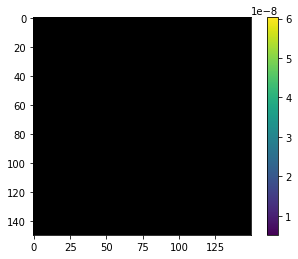

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(np.squeeze(Drag_train[-2]))
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
images = np.concatenate([Loupe_train,Drag_train])
print(len(images))
Images = np.array(images)
print(Images.shape)

In [ ]:
etiquetas_Loupe = np.repeat(0,2000)
print(len(etiquetas_Loupe))
print(etiquetas_Loupe)

In [ ]:
etiquetas_Drag = np.repeat(1,2000)
print(len(etiquetas_Drag))
print(etiquetas_Drag)

In [ ]:
class_names = ["Loupe","Drag"]

In [ ]:
labels = np.concatenate([etiquetas_Loupe, etiquetas_Drag])
print(labels.shape)
print(labels)
Labels = np.array(labels)
print(Labels[3999])

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import tensorflow.keras.optimizers as Optimizer

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(150, 150,3)),
    keras.layers.Dense(128, activation='relu'),
    
    keras.layers.Dense(2, activation='softmax'),
    
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(Images, Labels, epochs=30)
trained=model.fit(Images, Labels, epochs=30)

In [ ]:
depronto sirve

#data_dir = pathlib.Path("/content/drive/MyDrive/dataset/dataset/real/images/Loupe")

for img2 in os.listdir(ruta_Drag1):
  img2 = cv2.imread(os.path.join(ruta_Drag1,img2))
data_dir = pathlib.Path("img2")
print(data_dir)
!ls -l img2
params = {
    "directory": data_dir,
    "validation_split": 0.2,
    "seed":12345,
    "image_size":(180, 180),
    "batch_size": 32
}

train_params = {**params,**{"subset":"training"}}
val_params = {**params,**{"subset":"validation"}}                

len(list(data_dir.glob("*/*.jpg")))
rain_ds = tf.keras.utils.image_dataset_from_directory(**train_params)
